<a href="https://colab.research.google.com/github/Taiba528/My-Python-World/blob/master/Ham_SpamCLassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Here I am going to analyse the tweets whether its ham & spam.I am going to explore the data first with different tools (word frequency, and word cloud)

In [1]:
import numpy as np
import pandas as pd
import nltk
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import operator
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import collections
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [3]:
# load dataset
from google.colab import files
uploaded = files.upload()

Saving SMS-Messages2.csv to SMS-Messages2.csv


In [0]:
df = pd.read_csv("SMS-Messages2.csv")

In [73]:
df.head()

,Message,Class_Label
0,'Go until jurong point,ham
1,'Ok lar... Joking wif u oni...',ham
2,'Free entry in 2 a wkly comp to win FA Cup fin...,spam
3,'U dun say so early hor... U c already then sa...,ham
4,'Nah I don\'t think he goes to usf,ham


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0    Message     200 non-null    object
 1   Class_Label  200 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


#Plot the data for visualization

Text(0.5, 0, 'Label')

Text(0.5, 1.0, 'Number of ham and spam messages')

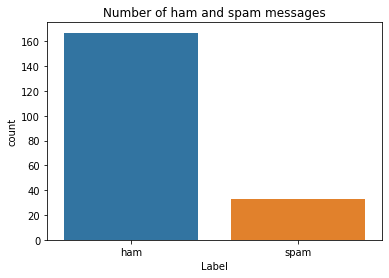

In [8]:
#Visualize the number of ham and spam messages
sns.countplot(df['Class_Label'])
plt.xlabel('Label')
plt.title('Number of ham and spam messages')



In [0]:
plot_size = plt.rcParams["figure.figsize"] 
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

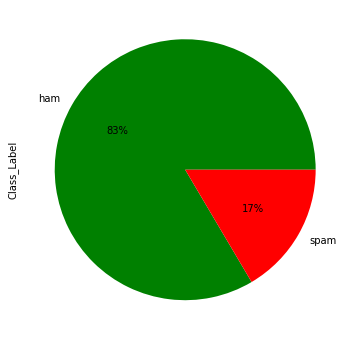

In [10]:
df.Class_Label.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green","red"])

In [19]:
df.columns

Index([' Message', 'Class_Label'], dtype='object')

In [25]:
df=df.rename(columns={' Message':'Message','Class_Label':'label'})
df.columns

Index(['Message', 'label'], dtype='object')

### From  bar graph &Pie-chart I understand that only 17% tweets spam,while 83% are ham.


Text(0.5, 1.0, 'ham_messages')

(-0.5, 399.5, 199.5, -0.5)

Text(0.5, 1.0, 'spam_messages')

(-0.5, 399.5, 199.5, -0.5)

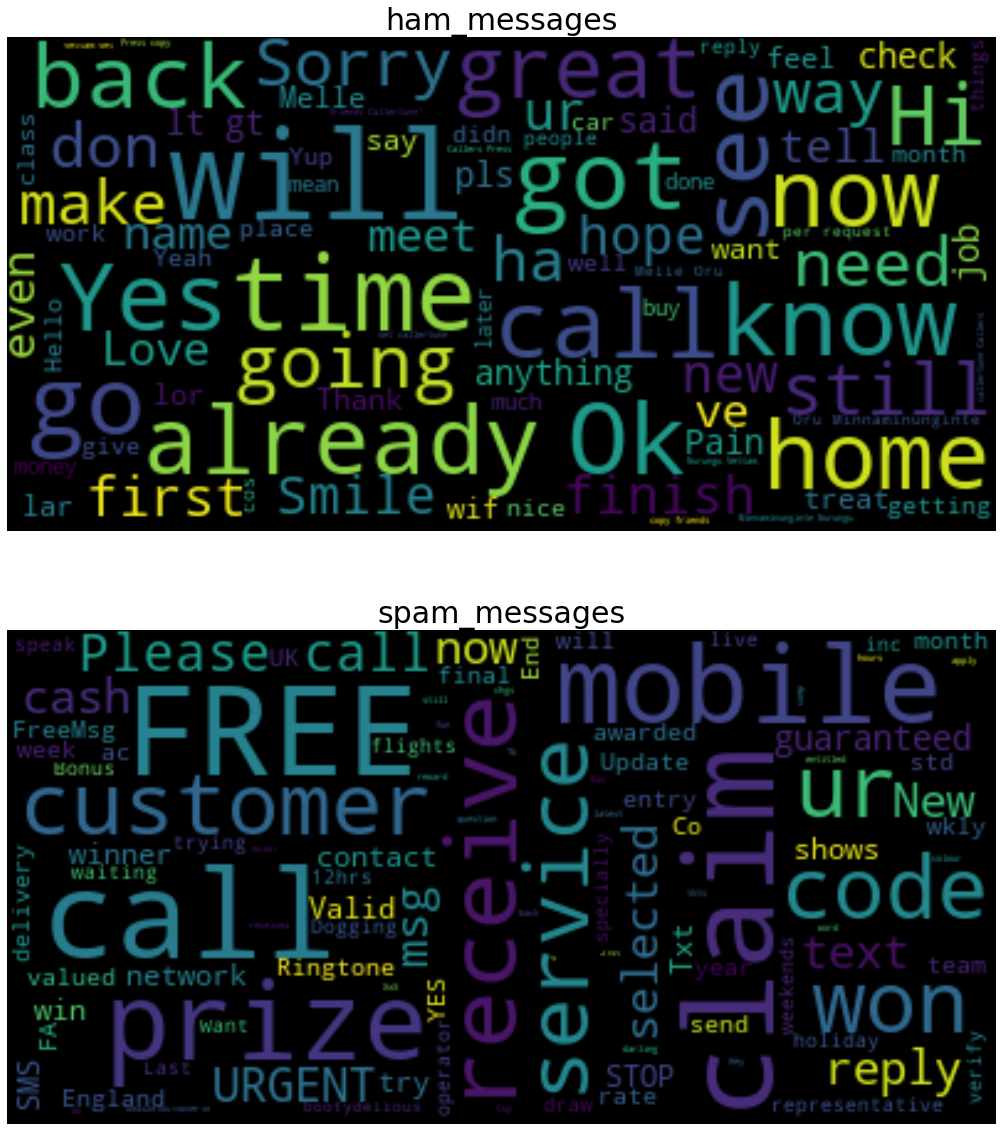

In [31]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# Start with one message:
df_ham=df[df['label'] == 'ham']
df_spam=df[df['label']=='spam']

message_all=" ".join(message for message in df.Message)
message_ham=" ".join(message for message in df_ham.Message)
message_spam=" ".join(message for message in df_spam.Message)


# Create and generate a word cloud image:
fig, ax = plt.subplots(2, 1, figsize  = (20,20))
wordcloud_ham = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(message_ham)
wordcloud_spam = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(message_spam)

# Display the generated image:
ax[0].imshow(wordcloud_ham, interpolation='bilinear')
ax[0].set_title('ham_messages', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_spam, interpolation='bilinear')
ax[1].set_title('spam_messages',fontsize=30)
ax[1].axis('off')

## Tokenization


In [32]:
word_list = []

max = len(df.Message)
for i in range (max):
  R1= df.Message[i]
  tokens = R1.split()
  #print(tokens)
  words = []
  
  for token in tokens:
    words.append(token.lower())
  word_list.append(words) 
print(len(word_list))
word_list[0:5]

200


[["'go", 'until', 'jurong', 'point'],
 ["'ok", 'lar...', 'joking', 'wif', 'u', "oni...'"],
 ["'free",
  'entry',
  'in',
  '2',
  'a',
  'wkly',
  'comp',
  'to',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  '21st',
  'may',
  '2005.',
  'text',
  'fa',
  'to',
  '87121',
  'to',
  'receive',
  'entry',
  'question(std',
  'txt',
  "rate)t&c\\'s",
  'apply',
  "08452810075over18\\'s'"],
 ["'u",
  'dun',
  'say',
  'so',
  'early',
  'hor...',
  'u',
  'c',
  'already',
  'then',
  "say...'"],
 ["'nah", 'i', "don\\'t", 'think', 'he', 'goes', 'to', 'usf']]

# Lexicon approach

In [33]:
from google.colab import files
uploaded=files.upload()

Saving AFINN-111.csv to AFINN-111 (1).csv


In [0]:
lex_file = open("AFINN-111.csv",encoding='cp1252')

In [0]:
lexicons = {}
records = lex_file.readlines()
for record in records:
    #print(record) # line contains newline charecter
    #print(record.rstrip('\n').split(",")) - to remove new line charecter
    lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])


In [38]:
#For each word in text
#Get the word score (score is a number if the word is in Lexicon, 0 if not)
#Add all the scores and find the ploarity
sentiment_score = []
for text in word_list:
    score = 0
    for word in text:
        if word in (lexicons):
            score = int(score + lexicons[word])
    sentiment_score.append(score)
sentiment_score[5]

0

In [41]:
df['sentiment_score'] = sentiment_score
df.tail()

,Message,label,sentiment_score
195,'How are you doing? Hope you\'ve settled in fo...,ham,0
196,'Gud mrng dear hav a nice day',ham,0
197,'Did u got that persons story',ham,0
198,'is your hamster dead? Hey so tmr i meet you a...,ham,0
199,'Hi its Kate how is your evening? I hope i can...,ham,0


# Feature Engineering

### Now I will do feature engineering and use BAG OF WORDS Technique to do analysis

In [0]:
df.groupby('label').count()

In [83]:
df.describe()

,Message,Class_Label
count,200,200
unique,196,2
top,'As per your request \'Melle Melle (Oru Minnam...,ham
freq,3,167


In [84]:
df.groupby('label').describe()

KeyError: ignored

In [57]:
df_ham['length']=df['Message'].apply(len)
df_ham.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Message,label,length
0,'Go until jurong point,ham,22
1,'Ok lar... Joking wif u oni...',ham,31
3,'U dun say so early hor... U c already then sa...,ham,51
4,'Nah I don\'t think he goes to usf,ham,34
6,'Even my brother is not like to speak with me....,ham,79


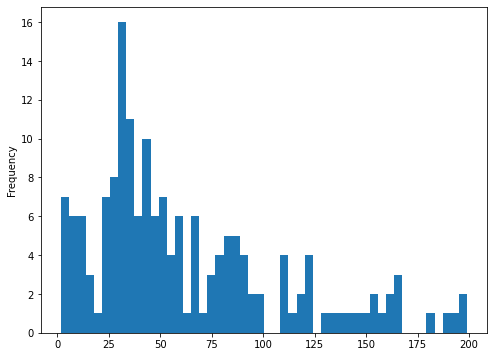

In [58]:
df_ham['length'].plot.hist(bins=50)

In [59]:
df_spam['length']=df['Message'].apply(len)
df_spam.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Message,label,length
2,'Free entry in 2 a wkly comp to win FA Cup fin...,spam,159
5,'FreeMsg Hey there darling it\'s been 3 week\'...,spam,137
8,'WINNER!! As a valued network customer you hav...,spam,159
9,'Had your mobile 11 months or more? U R entitl...,spam,156
11,'SIX chances to win CASH! From 100 to 20,spam,40


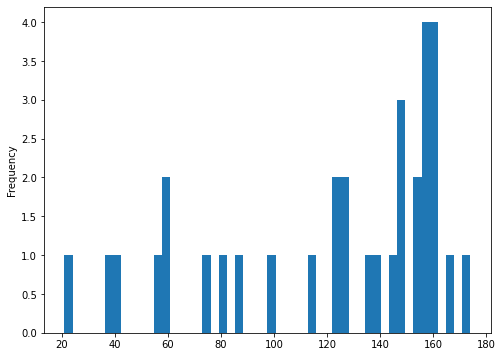

In [61]:
df_spam['length'].plot.hist(bins=50)

### It can be obsereved that SPAM messages generally have more characters

# Data preprocessing

In [126]:
#creating label & features
x = df.iloc[:, 0]
x.head()
y = df.iloc[:, 1]
y.head()


0                               'Go until jurong point
1                      'Ok lar... Joking wif u oni...'
2    'Free entry in 2 a wkly comp to win FA Cup fin...
3    'U dun say so early hor... U c already then sa...
4                   'Nah I don\'t think he goes to usf
Name:  Message, dtype: object

0     ham
1     ham
2    spam
3     ham
4     ham
Name: Class_Label, dtype: object

In [0]:
# Train Test Split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [92]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [97]:
nopunc=[c for c in message if c not in string.punctuation]
nopunc=''.join(nopunc)
nopunc.split()
clean_message=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


['ClassLabel']

In [104]:
def text_process( Message):
    nopunc=[char for char in  Message if char not in string.punctuation]
    
    nopunc=''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english') ]
df[' Message'].head(5).apply(text_process)

0                                  [Go, jurong, point]
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4                        [Nah, dont, think, goes, usf]
Name:  Message, dtype: object

In [111]:
#Instead of doing everything again, in which we have to get rid of punctuation, get rid of stop words, 
# And then do tf and idf we would use Pipelines option
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer=CountVectorizer(analyzer=text_process).fit(df[' Message'])
messages_bow=bow_transformer.transform( df[' Message'])
print('Shape of Sparse Matrix: ',messages_bow.shape)


Shape of Sparse Matrix:  (200, 1027)


In [0]:
#TF IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(messages_bow)
df_tfidf=tfidf_transformer.transform(messages_bow)

In [0]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model=MultinomialNB().fit(df_tfidf,df['Class_Label'])

In [129]:
pipeline=Pipeline([
        ('bow',CountVectorizer(analyzer=text_process)),
        ('tfidf',TfidfTransformer()),
        ('classifier',MultinomialNB())
    ])
pipeline.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fb303b13ae8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
predicted=pipeline.predict(x_test)

In [135]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predicted),confusion_matrix(y_test,predicted))


              precision    recall  f1-score   support

         ham       0.90      1.00      0.95        36
        spam       0.00      0.00      0.00         4

    accuracy                           0.90        40
   macro avg       0.45      0.50      0.47        40
weighted avg       0.81      0.90      0.85        40
 [[36  0]
 [ 4  0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Creating Labels and Features to apply ML models

In [44]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(df).toarray()
X
y=pd.get_dummies(df['Class_Label'])
y

array([[0, 1],
       [1, 0]])

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
195,1,0
196,1,0
197,1,0
198,1,0


In [0]:
#Strip the records and create a word list for each tweet in SMS Messages
word_list = []
for record in (data):
    #print(record)
    words = []
    tokens = record.split()
    #print(tokens)
    for token in tokens:
        words.append(token.lower())
    word_list.append(words)  
    
#word_list 

In [34]:
df_ham=df[df['Class_Label'] == 'ham']
df_spam=df[df['Class_Label']=='spam']
df_spam.head(2)


,Message,Class_Label
2,'Free entry in 2 a wkly comp to win FA Cup fin...,spam
5,'FreeMsg Hey there darling it\'s been 3 week\'...,spam


In [66]:
df['Class_Label'].value_counts()

ham     167
spam     33
Name: Class_Label, dtype: int64

#Tokenization

# The first step in text analytics after reading the file is tokenization .It can be done at sentence level,word level or even character level.Here I am tokenizing it at word level.


In [53]:
X.head()

0                               'Go until jurong point
1                      'Ok lar... Joking wif u oni...'
2    'Free entry in 2 a wkly comp to win FA Cup fin...
3    'U dun say so early hor... U c already then sa...
4                   'Nah I don\'t think he goes to usf
Name:  Message, dtype: object

In [0]:
word_list = []

max = len(X)
for i in range (max):
  R1= X[i]
  tokens = R1.split()
  #print(tokens)
  words = []
  
  for token in tokens:
    words.append(token.lower())
  word_list.append(words) 
print(len(word_list))
word_list[0:5]

200


[["'go", 'until', 'jurong', 'point'],
 ["'ok", 'lar...', 'joking', 'wif', 'u', "oni...'"],
 ["'free",
  'entry',
  'in',
  '2',
  'a',
  'wkly',
  'comp',
  'to',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  '21st',
  'may',
  '2005.',
  'text',
  'fa',
  'to',
  '87121',
  'to',
  'receive',
  'entry',
  'question(std',
  'txt',
  "rate)t&c\\'s",
  'apply',
  "08452810075over18\\'s'"],
 ["'u",
  'dun',
  'say',
  'so',
  'early',
  'hor...',
  'u',
  'c',
  'already',
  'then',
  "say...'"],
 ["'nah", 'i', "don\\'t", 'think', 'he', 'goes', 'to', 'usf']]

In [0]:
lex_file = open("AFINN-111.csv",encoding='cp1252')

In [87]:
#For each word in text
#Get the word score (score is a number if the word is in Lexicon, 0 if not)
#Add all the scores and find the ploarity
sentiment_score = []
for text in word_list:
    score = 0
    for word in text:
        if word in (lexicons):
            score = int(score + lexicons[word])
    sentiment_score.append(score)
sentiment_score[5]

5